In [26]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Scientific computing and numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Advanced data visualization

# Machine learning libraries
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.linear_model import LogisticRegression  # A common classification algorithm
from sklearn.metrics import accuracy_score,recall_score, classification_report , f1_score # Model evaluation metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix  # Confusion matrix for classification results
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelBinarizer
# Deep learning libraries (uncomment as needed)
# import tensorflow as tf
# import torch

<h2>Data import and visualization</h2>

In [27]:
train_df = pd.read_csv('Project_data/Project_Data_EE4C12_CE_ARR/ECG_data/train_data.csv')
print(train_df.shape)
test_df = pd.read_csv('Project_data/Project_Data_EE4C12_CE_ARR/ECG_data/test_data.csv')
val_df = pd.read_csv('Project_data/Project_Data_EE4C12_CE_ARR/ECG_data/val_data.csv')
# Display the first 5 rows of the DataFrame to confirm it loaded correctly
column_list = []
for i in range(train_df.shape[1]):
    column_list.append(str(i))
train_df.columns = column_list
test_df.columns = column_list
val_df.columns = column_list
print(column_list)
# print(test_df.shape)
#print(train_df)
# print(val_df.shape)
# print(val_df.columns)

(65669, 251)
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156

Each row is a single beat

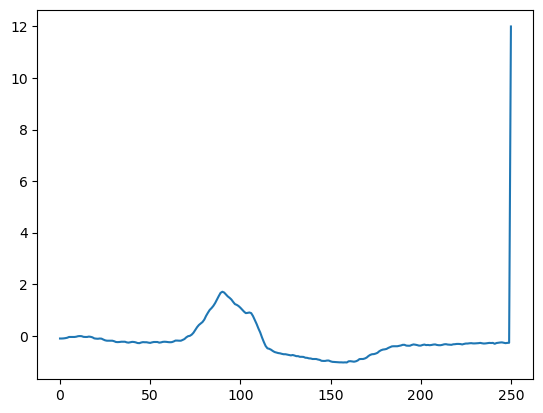

In [28]:
x = np.arange(0,251,1)
y = train_df.iloc[0]

plt.plot(x,y)
plt.show()

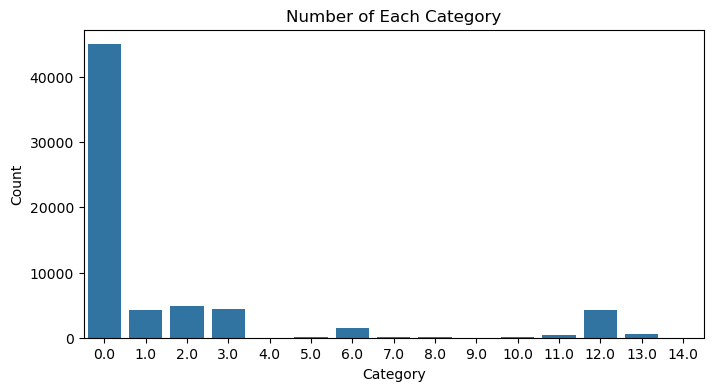

250
0.0     45011
2.0      4843
3.0      4353
12.0     4277
1.0      4215
6.0      1528
13.0      589
11.0      481
5.0       137
7.0        90
10.0       64
8.0        49
14.0       20
4.0        10
9.0         2
Name: count, dtype: int64


In [29]:
categories = train_df.iloc[:,-1].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=categories.index, y=categories.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Each Category')
plt.show()
print(categories)

<h2>Data pre-processing</h2>

Data is normalized with a std normalization as it is more robust to outliers than min-max

In [30]:
x_train_raw=  train_df.drop('250',axis = 1)

scaler = StandardScaler().fit(x_train_raw)
x_train = scaler.transform(x_train_raw)

y_train_raw = train_df['250']

x_val_raw = val_df.drop('250',axis = 1)
x_val_raw = scaler.transform(x_val_raw)

y_val_raw = val_df['250']

x_test_raw = test_df.drop('250',axis = 1)
x_test_raw = scaler.transform(x_test_raw)

y_test_raw = test_df['250']

Transforming output cathegories with one-hot encoding in order to avoid ordinal relationship bias

In [33]:
lb = LabelBinarizer()
lb.fit(y_train_raw)

y_train = lb.transform(y_train_raw)
y_val = lb.transform(y_val_raw)
y_test = lb.transform(y_test_raw)

<h1>MLP models</h1>

<h2>Simple MLP Classifier</h2>

In [34]:
# we can see that the dataset is imbalanced, with some categories having significantly more samples than others.
#lets create simple Deeplearning model using skicitlearn to classify the ECG signals into their respective categories.

mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', max_iter=30, random_state=42)
mlp.fit(x_train, y_train)

c:\Users\azati\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=30, random_state=42)

In [36]:
y_pred_val = mlp.predict(x_val_raw)
y_pred_test = mlp.predict(x_test_raw)

In [37]:
# Convert one-hot encoded validation labels and predictions back to single-column format
y_val_single = np.argmax(y_val, axis=1)
y_pred_val_single = np.argmax(y_pred_val, axis=1)
y_test_single = np.argmax(y_test, axis=1)
y_pred_test_single = np.argmax(y_pred_test, axis=1)

--- Validation Metrics ---
Accuracy score: 0.9447236180904522
Recall score: 0.3735479551312585
F1 score: 0.38370579831372675


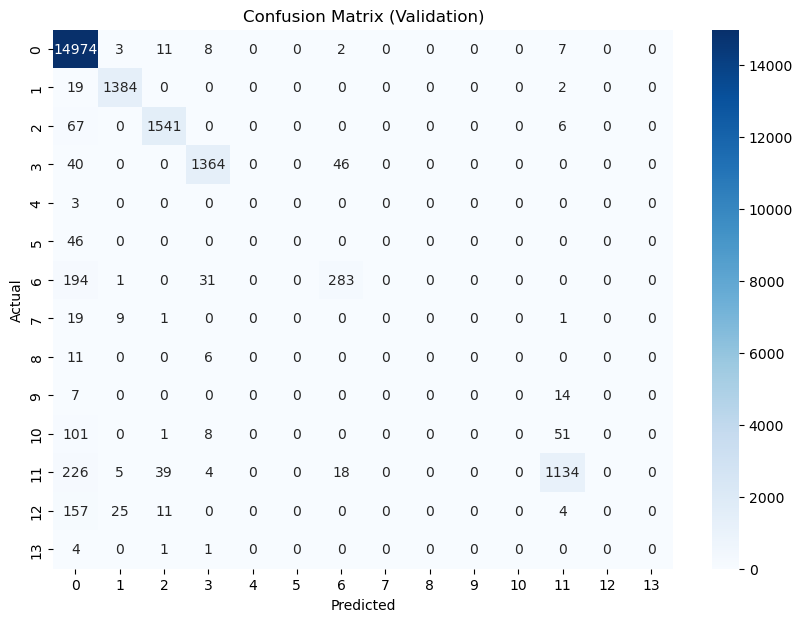


--- Test Metrics ---
Accuracy score: 0.9442211055276382
Recall score: 0.37280376532408194
F1 score: 0.3826048707080426


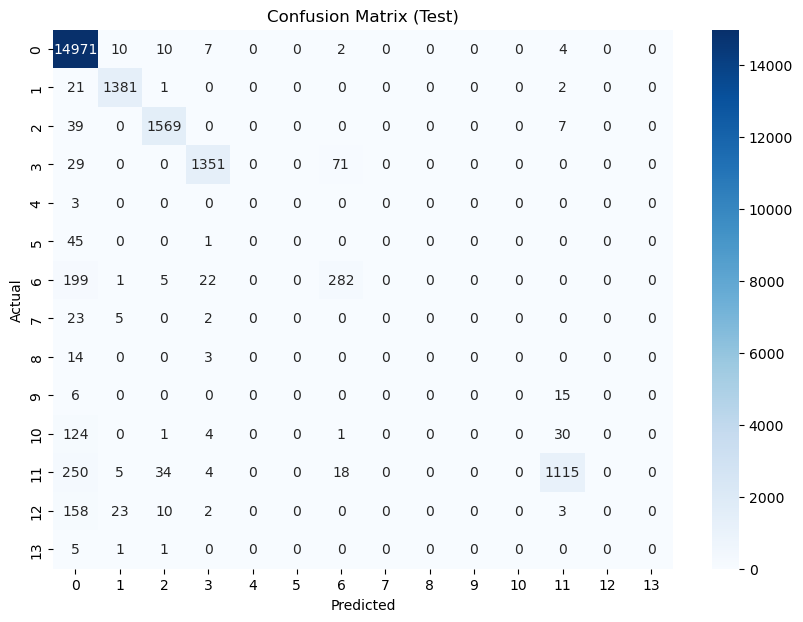

In [38]:
#confusion matrix validation
print("--- Validation Metrics ---")
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_single))
print("Recall score:", recall_score(y_val_single, y_pred_val_single, average='macro'))# macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_single, average='macro'))


conf = confusion_matrix(y_val_single, y_pred_val_single)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

#confusion matrix test
print("\n--- Test Metrics ---")
print("Accuracy score:", accuracy_score(y_test_single, y_pred_test_single))
print("Recall score:", recall_score(y_test_single, y_pred_test_single, average='macro'))
print("F1 score:", f1_score(y_test_single, y_pred_test_single, average='macro'))

conf = confusion_matrix(y_test_single, y_pred_test_single)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test)')
plt.show()

The simple MLP classifier underfits the problem, the accuracy is high just because it predicts most samples to be in the group with the biggest number of samples. The recall instead, when averaged for different classes, is very low.

<h2>MLP Classifier with weighted samples</h2>

In [48]:
%pip install --upgrade scikit-learn
%pip install imbalanced-learn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 5.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.1 MB 5.3 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 5.5 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.1 MB 5.6 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 5.7 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 5.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 5.6 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 5.5 MB/s eta 0:00:00Note: you may need to restart the kernel to use updated packages.

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalli

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert y_train from one-hot if needed (already one-hot, so use as is)
# If y_train was not one-hot: y_train = to_categorical(y_train_raw)

# Build a simple MLP model
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Compute class weights for imbalanced data

classes = np.unique(y_train_raw)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_raw)
class_weight_dict = dict(zip(classes.astype(int), class_weights))

# Fit the model
model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    class_weight=class_weight_dict,
    validation_data=(x_val_raw, y_val),
    verbose=1
)

Epoch 1/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.2241 - loss: 2.5291 - val_accuracy: 0.1913 - val_loss: 2.1694
Epoch 2/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.2159 - loss: 2.1669 - val_accuracy: 0.1936 - val_loss: 2.1737
Epoch 3/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.2525 - loss: 2.0344 - val_accuracy: 0.3406 - val_loss: 1.8506
Epoch 4/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3063 - loss: 1.7629 - val_accuracy: 0.3427 - val_loss: 1.7932
Epoch 5/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3159 - loss: 1.6915 - val_accuracy: 0.3631 - val_loss: 1.7345
Epoch 6/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.3652 - loss: 1.5573 - val_accuracy: 0.3710 - val_loss: 1.7615
Epoch 7/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.3391 - loss: 1.4562 - val_accuracy: 0.2756 - val_loss: 1.8348
Epoch 8/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.3051 - loss

In [51]:
y_pred_val_weight = model.predict(x_val_raw)
y_pred_test_weight = model.predict(x_test_raw)

y_pred_val_single = np.argmax(y_pred_val_weight, axis=1)
y_pred_test_single = np.argmax(y_pred_test_weight, axis=1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy score: 0.5383736866148926
Recall score: 0.6541073677899341
F1 score: 0.3290289581106759


c:\Users\azati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


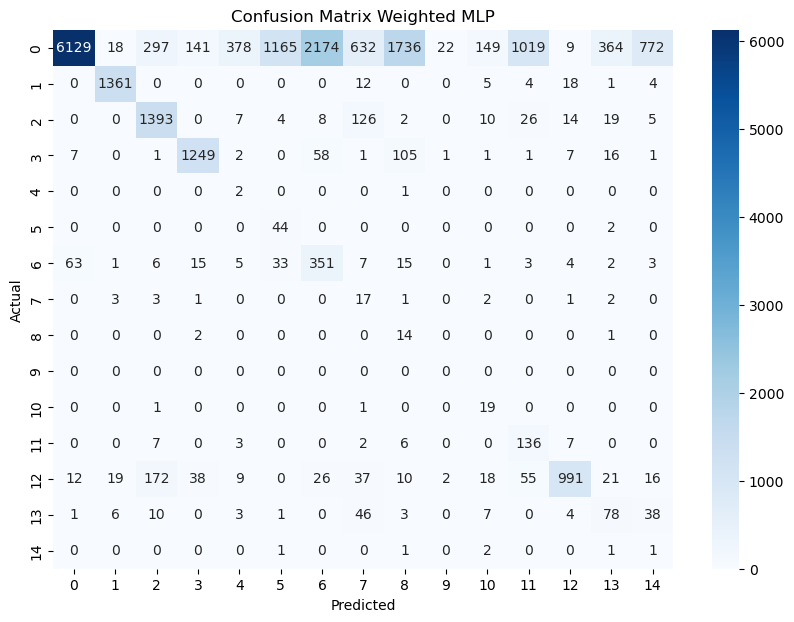

Accuracy score: 0.5305162174508908
Recall score: 0.6575314973088985
F1 score: 0.32517484900693927


c:\Users\azati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


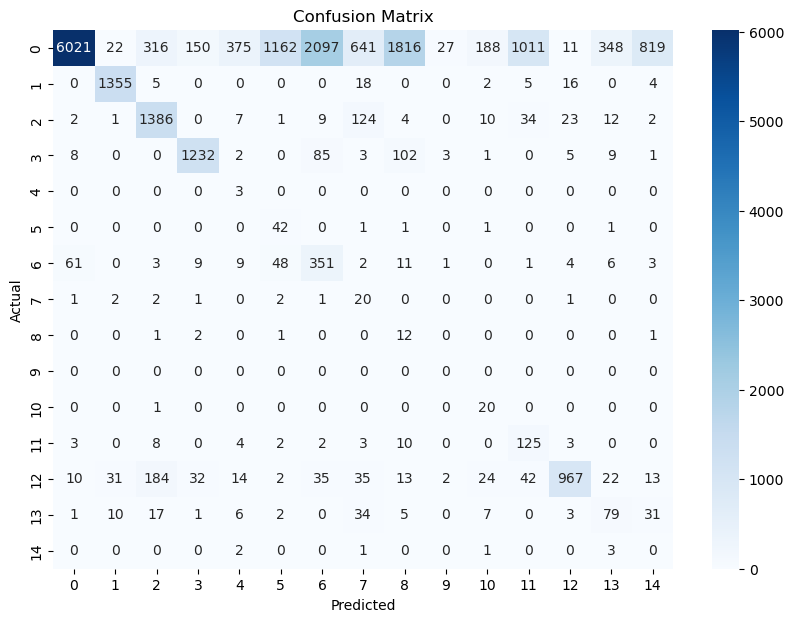

In [52]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_single))
print("Recall score:", recall_score(y_val_single, y_pred_val_single, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_single, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_single)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()
#confusion matrix test
print("Accuracy score:",accuracy_score(y_test_single, y_pred_test_single))
print("Recall score:", recall_score(y_test_single, y_pred_test_single, average='macro')) 
print("F1 score:", f1_score(y_test_single, y_pred_test_single, average='macro'))


conf = confusion_matrix(y_test_single, y_pred_test_single)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Now the accuracy is down, but the recall slightly improved. F1-score decreased 

<h2>MLP Classifier applying SMOTE</h2>

SMOTE can be used to oversample rare classes

In [53]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

c:\Users\azati\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\azati\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\azati\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\azati\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

In [56]:
mlp_SMOTE = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', max_iter=30, random_state=42)
mlp_SMOTE.fit(x_train_resampled, y_train_resampled)

c:\Users\azati\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=30, random_state=42)

In [57]:
y_pred_val_SMOTE = mlp_SMOTE.predict(x_val_raw)
y_pred_test_SMOTE = mlp_SMOTE.predict(x_test_raw)

In [58]:
y_pred_val_single_SMOTE = np.argmax(y_pred_val_SMOTE, axis=1)
y_pred_test_single_SMOTE = np.argmax(y_pred_test_SMOTE, axis=1)

Accuracy score: 0.8113750571037003
Recall score: 0.6122146347659941
F1 score: 0.45322838191853204


c:\Users\azati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


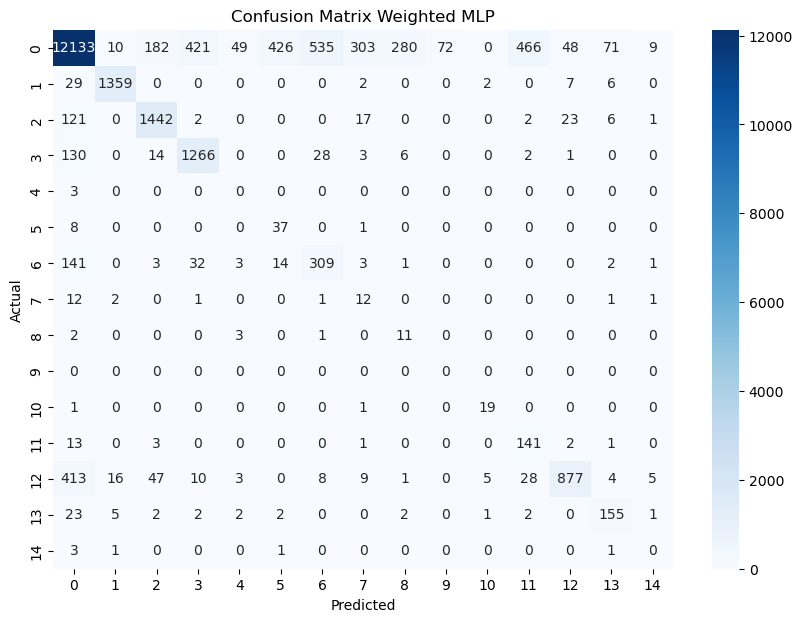

Accuracy score: 0.8064412973960713
Recall score: 0.6318712375305183
F1 score: 0.4403026988584314


c:\Users\azati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


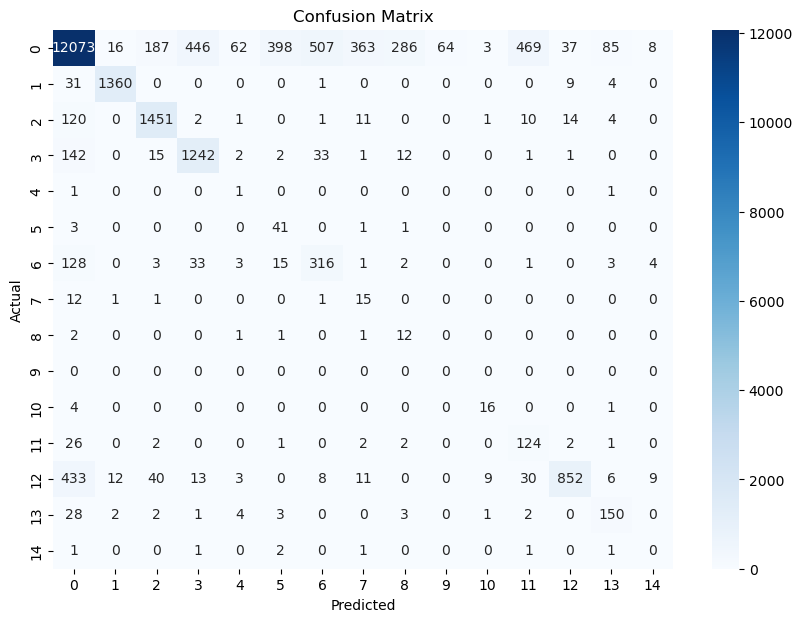

In [59]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_single_SMOTE))
print("Recall score:", recall_score(y_val_single, y_pred_val_single_SMOTE, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_single_SMOTE, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_single_SMOTE)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()

#confusion matrix test
print("Accuracy score:",accuracy_score(y_test_single, y_pred_test_single_SMOTE))
print("Recall score:", recall_score(y_test_single, y_pred_test_single_SMOTE, average='macro')) 
print("F1 score:", f1_score(y_test_single, y_pred_test_single_SMOTE, average='macro'))


conf = confusion_matrix(y_test_single, y_pred_test_single_SMOTE)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model now has better accuracy and recall than in the simple case and weighted case

<h2>MLP Classifier with randomized search of hidden layer dimension, using SMOTE</h2>

In [60]:
pipeline = Pipeline([
    ('smote', SMOTE(k_neighbors=1, random_state=42)),
    ('mlp', MLPClassifier(max_iter=30, random_state=42, early_stopping=True)) # Added early stopping
])

In [68]:
# Less demanding random search setup
param_dist = {
    'mlp__hidden_layer_sizes': [
        (32,),                # Single hidden layer
        (64, 32),             # Two hidden layers
    ],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate_init': [0.001]
}



In [69]:
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Number of parameter settings that are sampled.
    cv=3,       # 3-fold cross-validation.
    scoring='f1_macro',
    n_jobs=-1,  # Use all available cores.
    random_state=42,
    verbose=1   # Shows progress
)

In [70]:

print("Starting hyperparameter tuning...")
# The search is performed on your original training data.
# The pipeline handles the SMOTE application internally.
random_search.fit(x_train, y_train)

Starting hyperparameter tuning...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\azati\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\azati\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
c:\Users\azati\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('smote',
                                              SMOTE(k_neighbors=1,
                                                    random_state=42)),
                                             ('mlp',
                                              MLPClassifier(early_stopping=True,
                                                            max_iter=30,
                                                            random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'mlp__activation': ['relu'],
                                        'mlp__alpha': [0.0001, 0.001],
                                        'mlp__hidden_layer_sizes': [(32,),
                                                                    (64, 32)],
                                        'mlp__learning_rate_init': [0.001]},
                   random_state=42, scoring='f1_macro', verbose=1)

In [71]:
# --- Step 4: Display the Best Results ---
print("\n------------------------------------")
print("Randomized Search Complete!")
print("Best F1 macro score found: {:.4f}".format(random_search.best_score_))
print("Best parameters found:")
print(random_search.best_params_)


------------------------------------
Randomized Search Complete!
Best F1 macro score found: nan
Best parameters found:
{'mlp__learning_rate_init': 0.001, 'mlp__hidden_layer_sizes': (32,), 'mlp__alpha': 0.0001, 'mlp__activation': 'relu'}


<h2> model with deleted no disease data</h2>

In [75]:
# Downsample "no disease" (label 0.0) to 10% of its original count
no_disease_mask = y_train_raw == 0.0
disease_mask = ~no_disease_mask

# Indices for each group
no_disease_indices = y_train_raw[no_disease_mask].index
disease_indices = y_train_raw[disease_mask].index

# Randomly sample 10% of "no disease"
np.random.seed(42)
no_disease_sample = np.random.choice(no_disease_indices, size=int(0.1 * len(no_disease_indices)), replace=False)

# Combine with all disease indices
selected_indices = np.concatenate([no_disease_sample, disease_indices])

# Subset the data
x_train_reduced = x_train[selected_indices]
y_train_reduced = y_train[selected_indices]

print("Original x_train shape:", x_train.shape)
print("Reduced x_train shape:", x_train_reduced.shape)


Original x_train shape: (65669, 250)
Reduced x_train shape: (25159, 250)


In [76]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_reduced, y_train_reduced)

In [85]:
mlp_SMOTE = MLPClassifier(hidden_layer_sizes=(20, 5), activation='relu', max_iter=60, random_state=42)
mlp_SMOTE.fit(x_train_resampled, y_train_resampled)

c:\Users\azati\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 5), max_iter=60, random_state=42)

In [86]:
y_pred_val_SMOTE = mlp_SMOTE.predict(x_val_raw)
y_pred_test_SMOTE = mlp_SMOTE.predict(x_test_raw)

In [87]:
y_pred_val_single_SMOTE = np.argmax(y_pred_val_SMOTE, axis=1)
y_pred_test_single_SMOTE = np.argmax(y_pred_test_SMOTE, axis=1)

Accuracy score: 0.8656920968478757
Recall score: 0.6653056432516056
F1 score: 0.4884818344408414


c:\Users\azati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


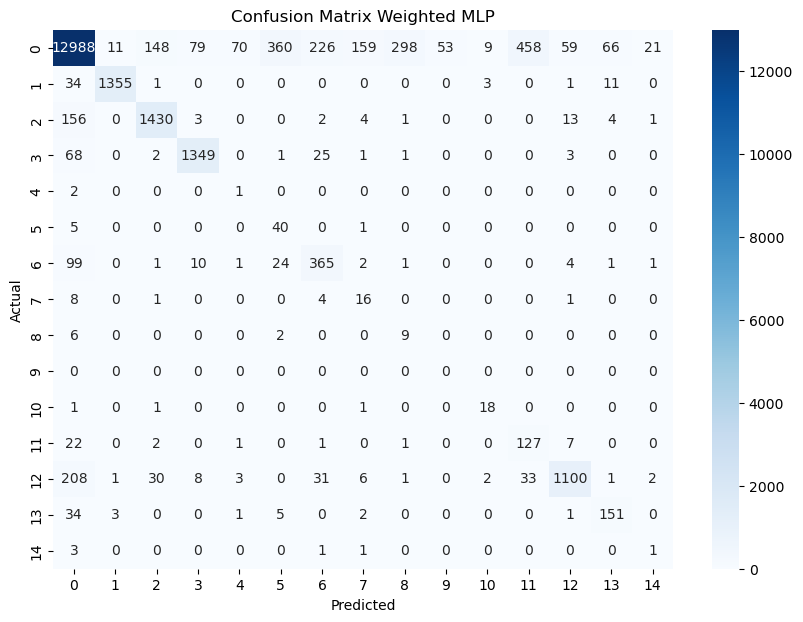

Accuracy score: 0.8630424851530379
Recall score: 0.6395410303183726
F1 score: 0.4880333463517751


c:\Users\azati\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


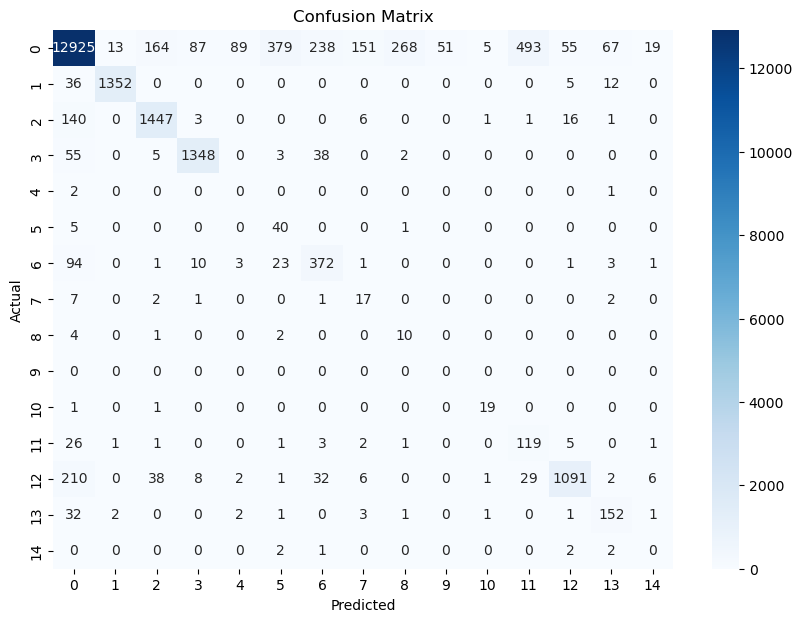

In [88]:
#confusion matrix validation
print("Accuracy score:", accuracy_score(y_val_single, y_pred_val_single_SMOTE))
print("Recall score:", recall_score(y_val_single, y_pred_val_single_SMOTE, average='macro')) # macro is used bc it gives the same importance for classes with less samples
print("F1 score:", f1_score(y_val_single, y_pred_val_single_SMOTE, average='macro'))
conf = confusion_matrix(y_val_single, y_pred_val_single_SMOTE)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Weighted MLP')
plt.show()

#confusion matrix test
print("Accuracy score:",accuracy_score(y_test_single, y_pred_test_single_SMOTE))
print("Recall score:", recall_score(y_test_single, y_pred_test_single_SMOTE, average='macro')) 
print("F1 score:", f1_score(y_test_single, y_pred_test_single_SMOTE, average='macro'))


conf = confusion_matrix(y_test_single, y_pred_test_single_SMOTE)
plt.figure(figsize=(10,7))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()